In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')


from simulation.analyse import get_win_probabilities, get_simulations
from features.data_provider import get_feature_columns, get_whole_dataset, set_feature_columns
from models.score_model import get_model
from simulation.predictor import MaxProbabilityScorePredictor
from simulation.simulation import run_simulation, run_actual_tournament_simulation
from db.simulation_table import get_simulation_results, delete_all

from notebook_helpers import plot_bank_and_bets, run_unit_strategy, run_kelly_strategy

In [2]:
home = get_whole_dataset("home_score", filter_start="2014-06-12")
away = get_whole_dataset("away_score", filter_start="2014-06-12")
X = pd.concat([home[0], away[0]])
y = pd.concat([home[1], away[1]])
model = get_model(X=X, y=y, n_estimators=5000)
predictor = MaxProbabilityScorePredictor(model)

In [3]:
tournament_template = pd.read_csv('data/original/wc_2014_games_real.csv')
run_actual_tournament_simulation(tournament_template, predictor)
tournament_simulation = get_simulation_results()
tournament_simulation["true_outcome"] = np.sign(tournament_simulation["home_score"] - tournament_simulation["away_score"])
delete_all()

print("Accuracy:", sum(tournament_simulation["outcome"] == tournament_simulation["true_outcome"]) / tournament_template.shape[0])
tournament_simulation

Accuracy: 0.640625


,id,match_id,date,home_team,away_team,home_score,away_score,outcome,home_win_prob,draw_prob,away_win_prob,true_outcome
0,1,0,2014-06-12,Brazil,Croatia,3,1,1,0.536212,0.248088,0.215698,1
1,2,1,2014-06-13,Chile,Australia,3,1,1,0.570131,0.244106,0.185762,1
2,3,2,2014-06-13,Mexico,Cameroon,1,0,1,0.448741,0.269902,0.281356,1
3,4,3,2014-06-13,Spain,Netherlands,1,5,1,0.437568,0.272237,0.290195,-1
4,5,4,2014-06-14,Colombia,Greece,3,0,1,0.541334,0.254629,0.204036,1
5,6,5,2014-06-14,England,Italy,1,2,-1,0.340431,0.278533,0.381036,-1
6,7,6,2014-06-14,Ivory Coast,Japan,2,1,-1,0.318631,0.281753,0.399615,1
7,8,7,2014-06-14,Uruguay,Costa Rica,1,3,1,0.617517,0.229857,0.152624,-1
8,9,8,2014-06-15,Argentina,Bosnia and Herzegovina,2,1,1,0.642603,0.215844,0.141549,1
9,10,9,2014-06-15,France,Honduras,3,0,1,0.597511,0.239234,0.163253,1


In [4]:
match_bets = pd.read_csv('data/original/wc_2014_bets.csv')
match_bets

,id,date,home_team,away_team,1,X,2
0,0,2014-06-12,Brazil,Croatia,1.32,5.19,11.93
1,1,2014-06-13,Chile,Australia,1.42,4.48,8.76
2,2,2014-06-13,Mexico,Cameroon,2.18,3.15,3.78
3,3,2014-06-13,Spain,Netherlands,1.84,3.39,5.10
4,4,2014-06-14,Colombia,Greece,1.86,3.27,5.15
5,5,2014-06-14,England,Italy,2.51,2.99,3.28
6,6,2014-06-14,Ivory Coast,Japan,2.72,3.32,2.69
7,7,2014-06-14,Uruguay,Costa Rica,1.44,4.26,8.90
8,8,2014-06-15,Argentina,Bosnia and Herzegovina,1.30,5.66,10.54
9,9,2014-06-15,France,Honduras,1.27,6.04,12.18


Profit: 27.125%
Balance:  81.36


81.360000000000014

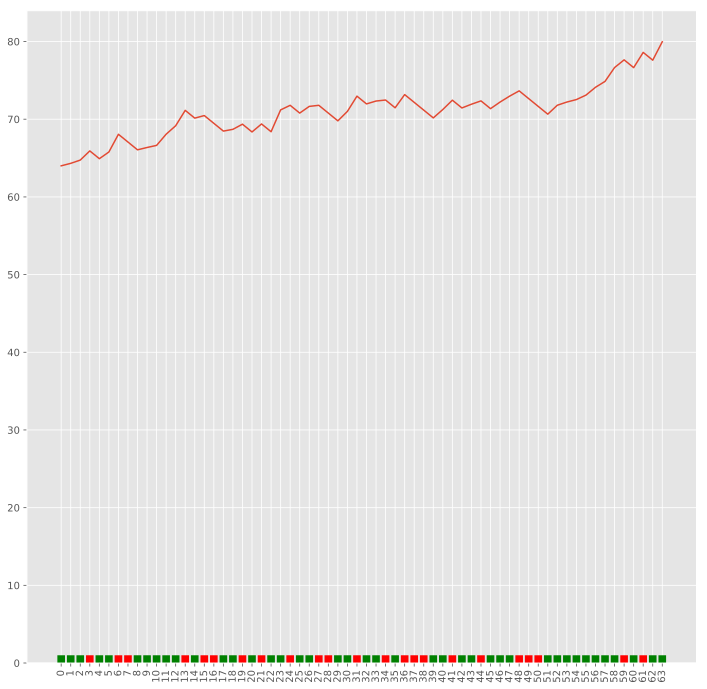

In [5]:
y_pred = tournament_simulation["outcome"].values
y_true = tournament_simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
run_unit_strategy(y_pred, y_true, odds, plot=True)

Profit: 187.2473%
Balance:  183.838285914


183.83828591365221

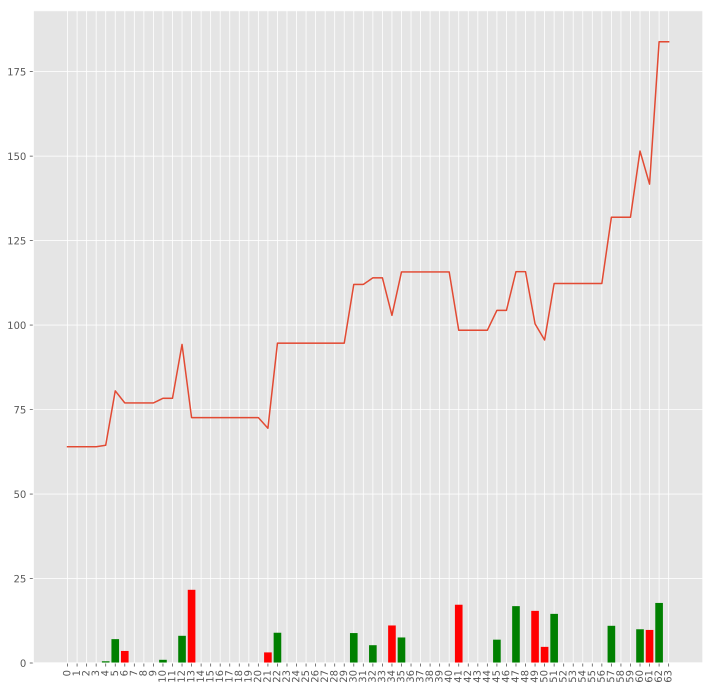

In [6]:
y_pred = tournament_simulation["outcome"].values
y_true = tournament_simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
probabilities = tournament_simulation[["home_win_prob", "draw_prob", "away_win_prob"]].values
run_kelly_strategy(y_pred, y_true, odds, probabilities, plot=True)

In [7]:
X.shape[0]

10306